In [650]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [651]:
file= '/content/Sentiment.csv'

In [652]:
df = pd.read_csv(file)

In [653]:
df.head()

id               candidate  candidate_confidence relevant_yn  \
0   1  No candidate mentioned                   1.0         yes   
1   2            Scott Walker                   1.0         yes   
2   3  No candidate mentioned                   1.0         yes   
3   4  No candidate mentioned                   1.0         yes   
4   5            Donald Trump                   1.0         yes   

   relevant_yn_confidence sentiment  sentiment_confidence     subject_matter  \
0                     1.0   Neutral                0.6578  None of the above   
1                     1.0  Positive                0.6333  None of the above   
2                     1.0   Neutral                0.6629  None of the above   
3                     1.0  Positive                1.0000  None of the above   
4                     1.0  Positive                0.7045  None of the above   

   subject_matter_confidence candidate_gold  ... relevant_yn_gold  \
0                     1.0000            NaN  ...              NaN   
1                     1.0000            NaN  ...              NaN   
2                     0.6629            NaN  ...              NaN   
3                     0.7039            NaN  ...              NaN   
4                     1.0000            NaN  ...              NaN   

  retweet_count  sentiment_gold subject_matter_gold  \
0             5             NaN                 NaN   
1            26             NaN                 NaN   
2            27             NaN                 NaN   
3           138             NaN                 NaN   
4           156             NaN                 NaN   

                                                text tweet_coord  \
0  RT @NancyLeeGrahn: How did everyone feel about...         NaN   
1  RT @ScottWalker: Didn't catch the full #GOPdeb...         NaN   
2  RT @TJMShow: No mention of Tamir Rice and the ...         NaN   
3  RT @RobGeorge: That Carly Fiorina is trending ...         NaN   
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...         NaN   

               tweet_created            tweet_id  tweet_location  \
0  2015-08-07 09:54:46 -0700  629697200650592256             NaN   
1  2015-08-07 09:54:46 -0700  629697199560069120             NaN   
2  2015-08-07 09:54:46 -0700  629697199312482304             NaN   
3  2015-08-07 09:54:45 -0700  629697197118861312           Texas   
4  2015-08-07 09:54:45 -0700  629697196967903232             NaN   

                user_timezone  
0                       Quito  
1                         NaN  
2                         NaN  
3  Central Time (US & Canada)  
4                     Arizona  

[5 rows x 21 columns]

In [654]:
df.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [655]:
df.describe()

id  candidate_confidence  relevant_yn_confidence  \
count  13871.000000          13871.000000            13871.000000   
mean    6936.000000              0.855689                0.927304   
std     4004.357127              0.241388                0.141696   
min        1.000000              0.222200                0.333300   
25%     3468.500000              0.674200                1.000000   
50%     6936.000000              1.000000                1.000000   
75%    10403.500000              1.000000                1.000000   
max    13871.000000              1.000000                1.000000   

       sentiment_confidence  subject_matter_confidence  retweet_count  \
count          13871.000000               13871.000000   13871.000000   
mean               0.756936                   0.782801      45.803331   
std                0.217682                   0.258215     153.981724   
min                0.186000                   0.222200       0.000000   
25%                0.651700                   0.641300       0.000000   
50%                0.681300                   1.000000       2.000000   
75%                1.000000                   1.000000      44.000000   
max                1.000000                   1.000000    4965.000000   

           tweet_id  
count  1.387100e+04  
mean   6.296058e+17  
std    9.611863e+13  
min    6.294531e+17  
25%    6.294861e+17  
50%    6.296726e+17  
75%    6.296882e+17  
max    6.297017e+17

In [656]:
df.shape

(13871, 21)

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [658]:
df.dtypes

id                             int64
candidate                     object
candidate_confidence         float64
relevant_yn                   object
relevant_yn_confidence       float64
sentiment                     object
sentiment_confidence         float64
subject_matter                object
subject_matter_confidence    float64
candidate_gold                object
name                          object
relevant_yn_gold              object
retweet_count                  int64
sentiment_gold                object
subject_matter_gold           object
text                          object
tweet_coord                   object
tweet_created                 object
tweet_id                       int64
tweet_location                object
user_timezone                 object
dtype: object

In [659]:
np.sum(df.isnull().any(axis=1))

13871

In [660]:
df.isnull().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [661]:
len(df)

13871

In [662]:
#dropping following columns because most of them are naN
df = df.drop(['candidate_gold','relevant_yn_gold','sentiment_gold','subject_matter_gold'],axis=1)

In [663]:
df.isnull().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
name                             0
retweet_count                    0
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [664]:
df = df.drop(['tweet_coord'],axis=1)

In [665]:
df.isnull().sum()

id                              0
candidate                      96
candidate_confidence            0
relevant_yn                     0
relevant_yn_confidence          0
sentiment                       0
sentiment_confidence            0
subject_matter                326
subject_matter_confidence       0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
tweet_id                        0
tweet_location               3912
user_timezone                4403
dtype: int64

In [666]:
df['sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [667]:
df['sentiment'].nunique()

3

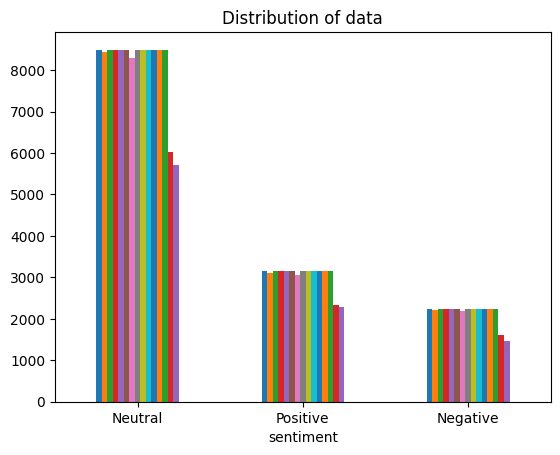

In [668]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Neutral','Positive','Negative'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

<Axes: xlabel='sentiment', ylabel='count'>

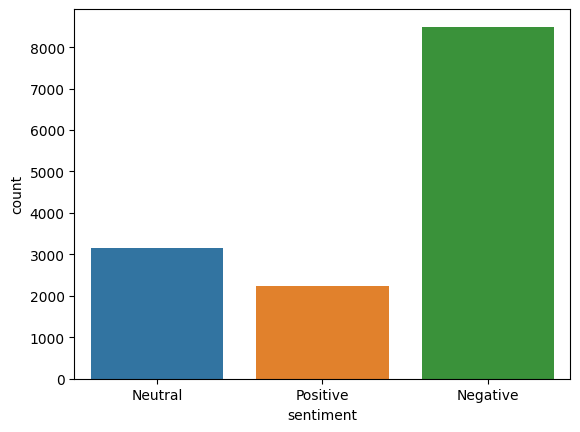

In [669]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [670]:
data=df[['text','sentiment']]

In [671]:
mapping = {'Neutral': 0, 'Positive': 1, 'Negative': 2}
data['sentiment'] = data['sentiment'].replace(mapping)

<ipython-input-671-b47a65551040>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].replace(mapping)


In [672]:
data['sentiment'].unique()

array([0, 1, 2])

In [673]:
data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]
data_neut = data[data['sentiment'] == 2]

In [674]:
df.shape

(13871, 16)

In [675]:
data_pos = data_pos.iloc[:int(3000)]
data_neg = data_neg.iloc[:int(3000)]
data_neut = data_neut.iloc[:int(3000)]

In [676]:
dataset = pd.concat([data_pos, data_neg,data_neut])

In [677]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

5123    rt @thebaxterbean: nothing says republican pop...
5128    the #gopdebate, in five clips http://t.co/swmo...
5129    explaining the #gopdebate to my dad who missed...
5130    i just have to laugh at all these 'analysis' o...
5131    odds on @realdonaldtrump uttering "#cuckservat...
Name: text, dtype: object

In [678]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [679]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

1     rt @scottwalker: didn't catch full #gopdebate ...
3     rt @robgeorge: carly fiorina trending -- hours...
4     rt @danscavino: #gopdebate w/ @realdonaldtrump...
5     rt @gregabbott_tx: @tedcruz: "on first day res...
11    rt @waynedupreeshow: woke tweet #gopdebate bes...
Name: text, dtype: object

In [680]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

5123    rt thebaxterbean nothing says republican popul...
5128    gopdebate five clips httptcoswmokmqzte dumband...
5129    explaining gopdebate dad missed describing snl...
5130    laugh analysis gopdebate entertainment thats a...
5131    odds realdonaldtrump uttering cuckservative ne...
Name: text, dtype: object

In [681]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

5123    rt thebaxterbean nothing says republican popul...
5128    gopdebate five clips httptcoswmokmqzte dumband...
5129    explaining gopdebate dad missed describing snl...
5130    laugh analysis gopdebate entertainment thats a...
5131    odds realdonaldtrump uttering cuckservative ne...
Name: text, dtype: object

In [682]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

5123    rt thebaxterbean nothing says republican popul...
5128    gopdebate five clips httptcoswmokmqzte dumband...
5129    explaining gopdebate dad missed describing snl...
5130    laugh analysis gopdebate entertainment thats a...
5131    odds realdonaldtrump uttering cuckservative ne...
Name: text, dtype: object

In [683]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

5123    rt thebaxterbean nothing says republican popul...
5128    gopdebate five clips httptcoswmokmqzte dumband...
5129    explaining gopdebate dad missed describing snl...
5130    laugh analysis gopdebate entertainment thats a...
5131    odds realdonaldtrump uttering cuckservative ne...
Name: text, dtype: object

In [684]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

1     [rt, scottwalker, didnt, catch, full, gopdebat...
3     [rt, robgeorge, carly, fiorina, trending, hour...
4     [rt, danscavino, gopdebate, w, realdonaldtrump...
5     [rt, gregabbotttx, tedcruz, on, first, day, re...
11    [rt, waynedupreeshow, woke, tweet, gopdebate, ...
Name: text, dtype: object

In [685]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

1     [rt, scottwalker, didnt, catch, full, gopdebat...
3     [rt, robgeorge, carly, fiorina, trending, hour...
4     [rt, danscavino, gopdebate, w, realdonaldtrump...
5     [rt, gregabbotttx, tedcruz, on, first, day, re...
11    [rt, waynedupreeshow, woke, tweet, gopdebate, ...
Name: text, dtype: object

In [686]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1     [rt, scottwalker, didnt, catch, full, gopdebat...
3     [rt, robgeorge, carly, fiorina, trending, hour...
4     [rt, danscavino, gopdebate, w, realdonaldtrump...
5     [rt, gregabbotttx, tedcruz, on, first, day, re...
11    [rt, waynedupreeshow, woke, tweet, gopdebate, ...
Name: text, dtype: object

In [687]:
X=data.text
y=data.sentiment

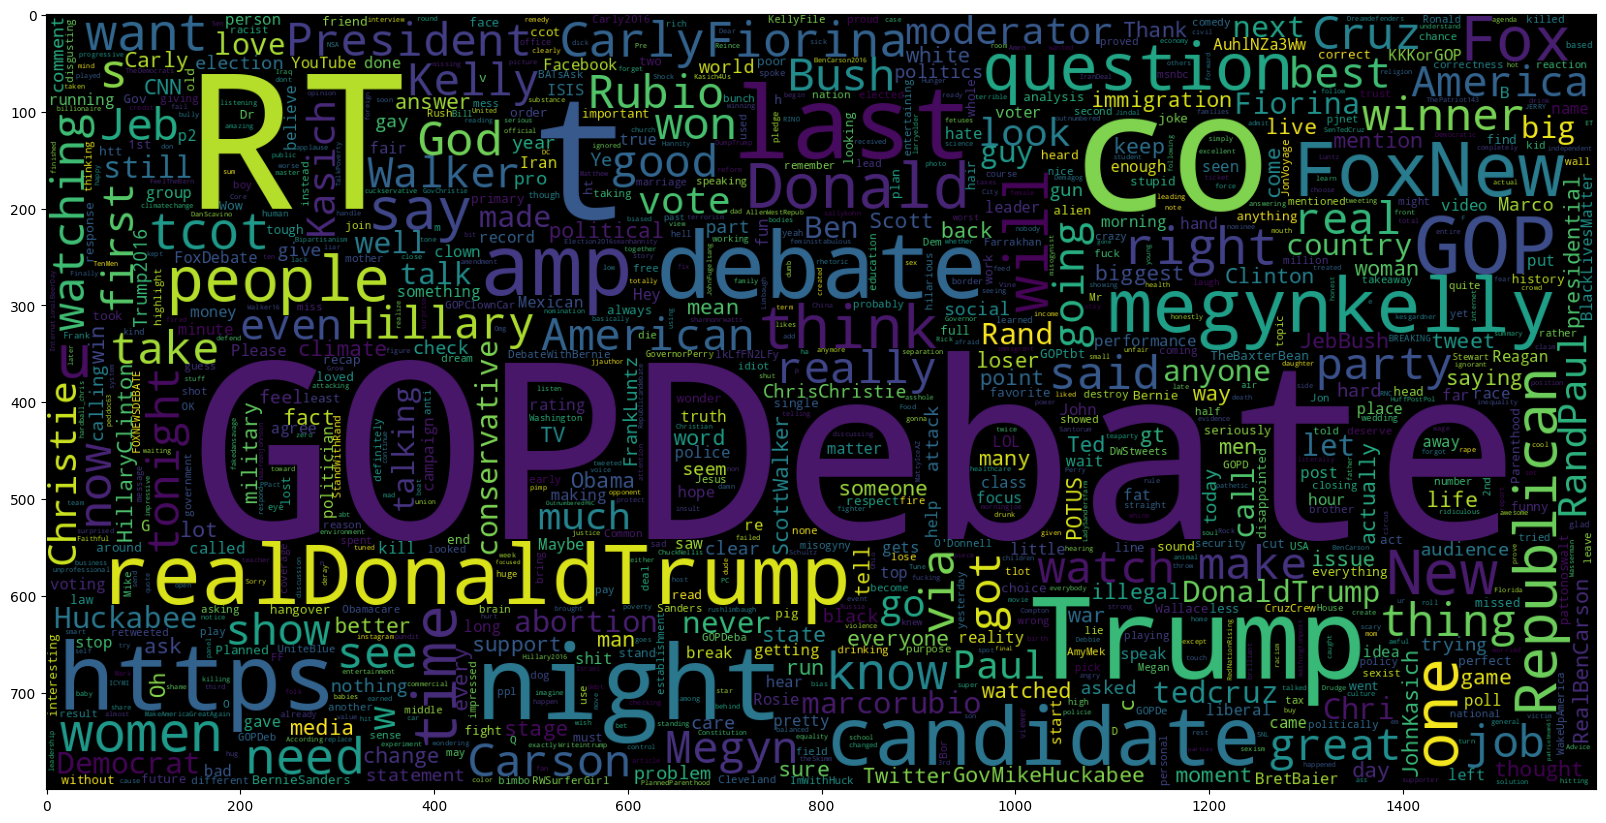

In [688]:
data_neg = data['text'][:8000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

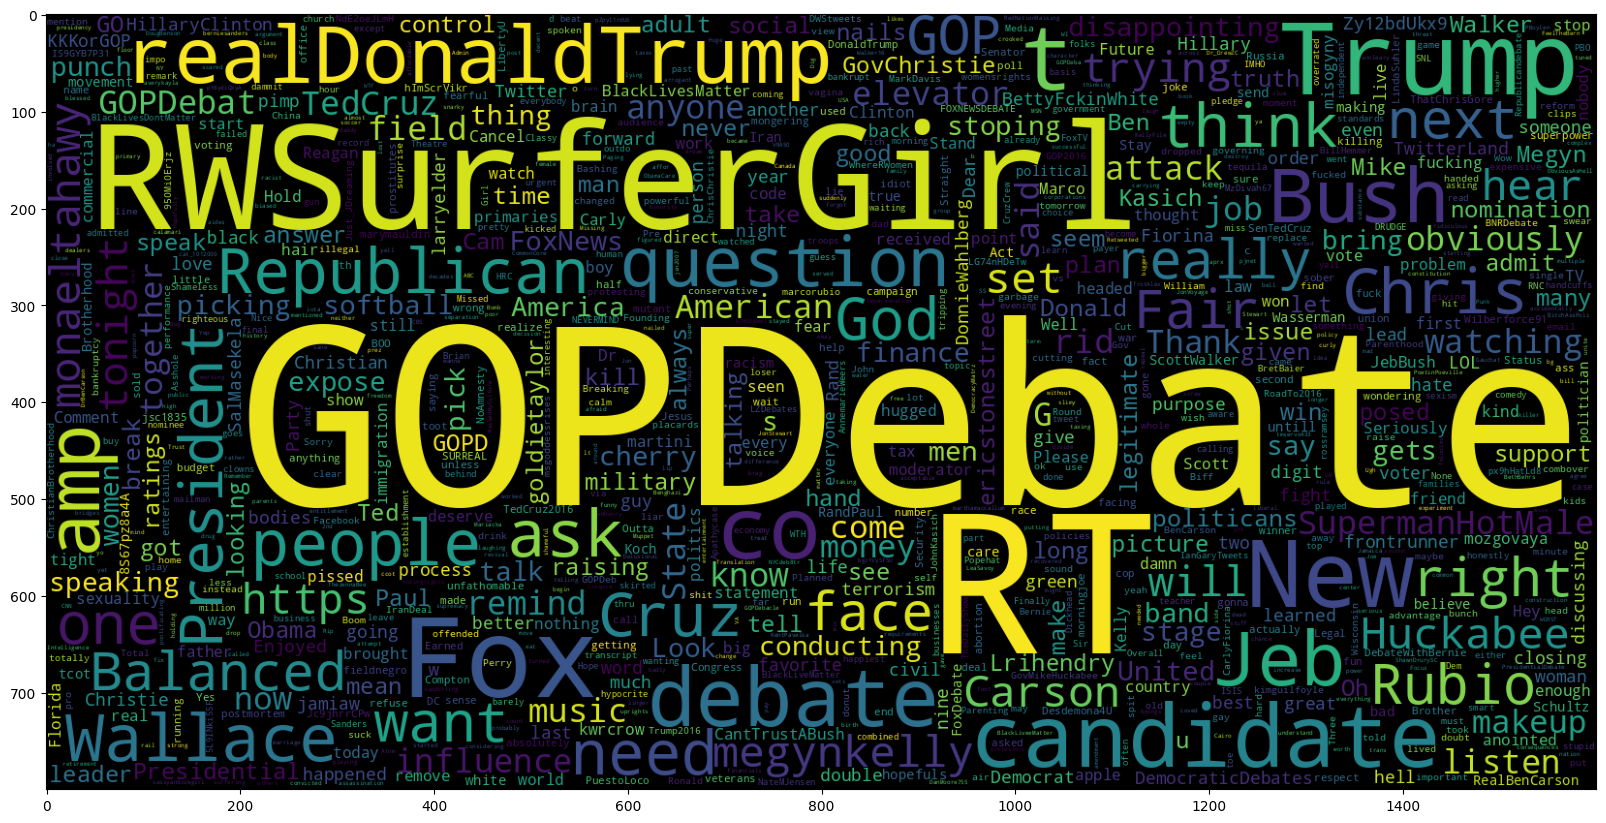

In [689]:
data_pos = data['text'][8000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

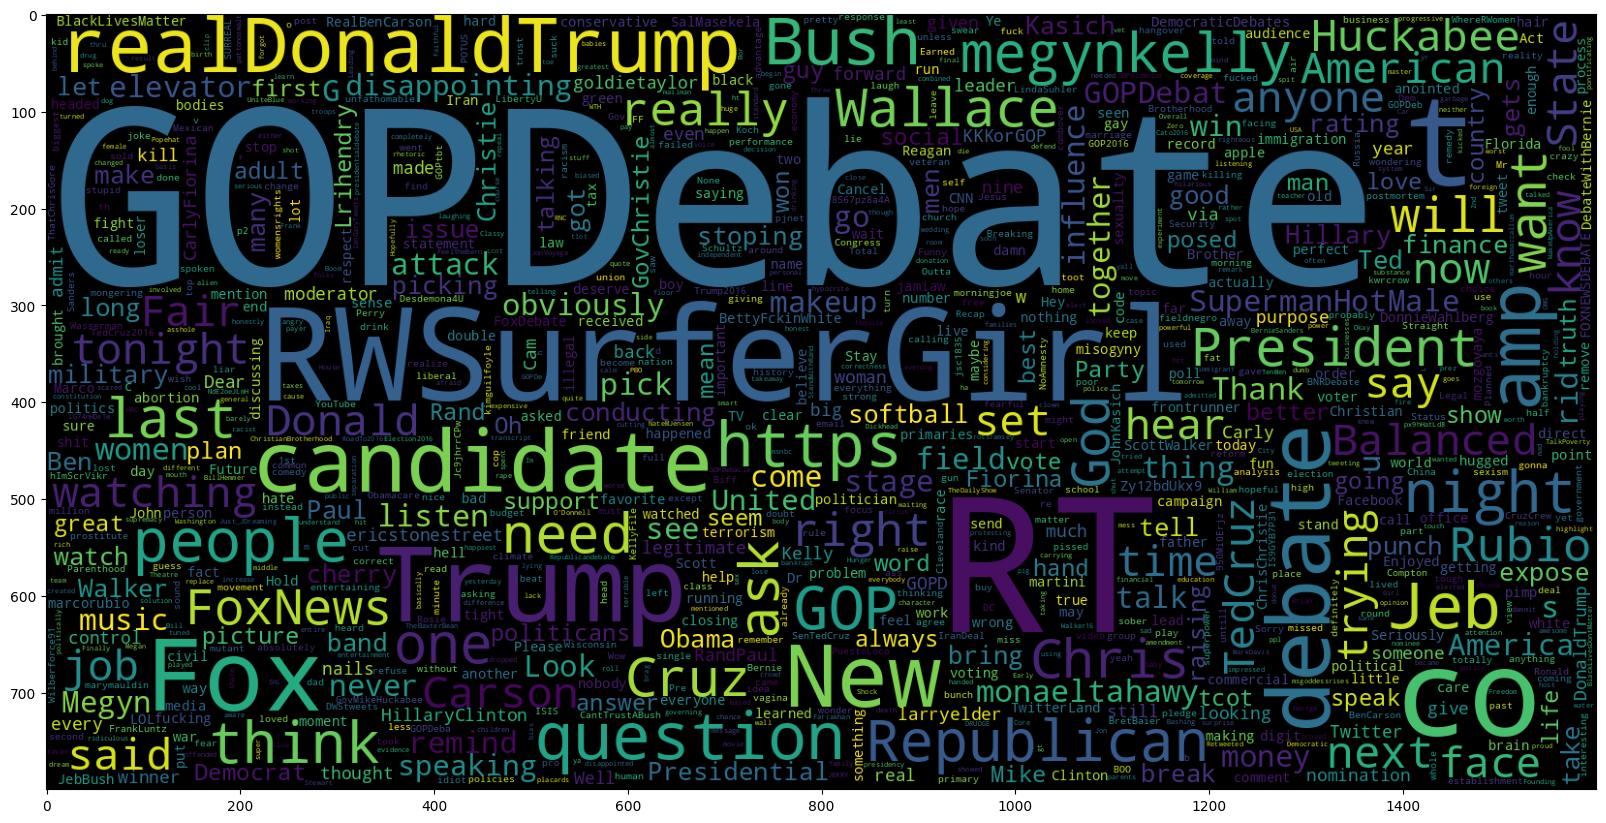

In [690]:
data_neut = data['text'][5000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_neut))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [717]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [718]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  50000


In [719]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [720]:
from sklearn.metrics import classification_report, confusion_matrix

def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Neutral', 'Positive', 'Negative']
    group_names = ['True Neg', 'False Pos', 'True Neut', 'False Neut', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 3)

    sns.heatmap(cf_matrix,  cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)

    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()



              precision    recall  f1-score   support

           0       0.53      0.24      0.33       612
           1       0.72      0.21      0.33       441
           2       0.68      0.94      0.79      1722

    accuracy                           0.67      2775
   macro avg       0.64      0.46      0.48      2775
weighted avg       0.65      0.67      0.62      2775



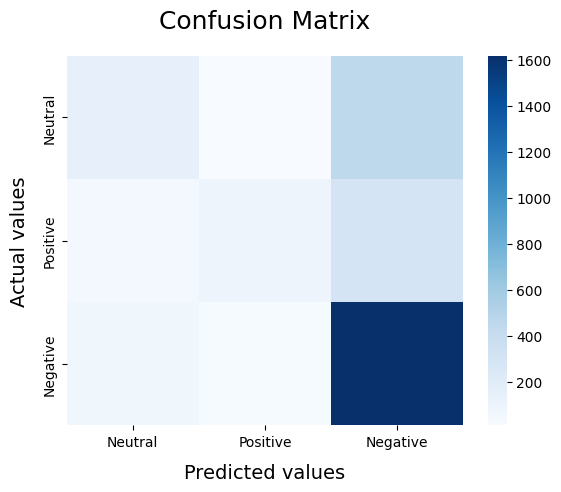

In [721]:
#using Bernoulli Naive Bayes Classifier
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)